<a href="https://colab.research.google.com/github/avashs/SDSS-Decision-Tree/blob/main/DecisionTreeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### model to determine star,galaxy or quasar using decision tree model
import pandas as pd
import numpy as np


def load_SDSS_data():
    url = 'https://raw.githubusercontent.com/avashs/SDSS-Decision-Tree/main/Skyserver_SQL2_27_2018%206_51_39%20PM.csv'
    df1 = pd.read_csv(url)
    return df1

SDSS = load_SDSS_data()
SDSS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Ra - right ascension, the data that gives the position of east to west in celestial sphere
dec - declination, the data that give the position of north -south in celestial sphere
u - ultraviolet light
g - green light
r - red light
i - near infrared
z - infrared 

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID

all values are not null values. So there is no need to cleanup the data to drop the null values.
The objid and spacejid are identifier values which are not needed for the model to train. 
The class  distinguishes whether they are galaxy, star or quasar. They are object type and need to be converted to numerical value for model to use it. 


In [ ]:
SDSS.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
import matplotlib.pyplot as plt
SDSS['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

Here we look through the data to see if there are any fields that have values. We know that the objid and spacejid are not useful since they are identifier only. 

In [ ]:
data = SDSS.drop("objid",axis = 1)
data = data.drop("specobjid",axis = 1)
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


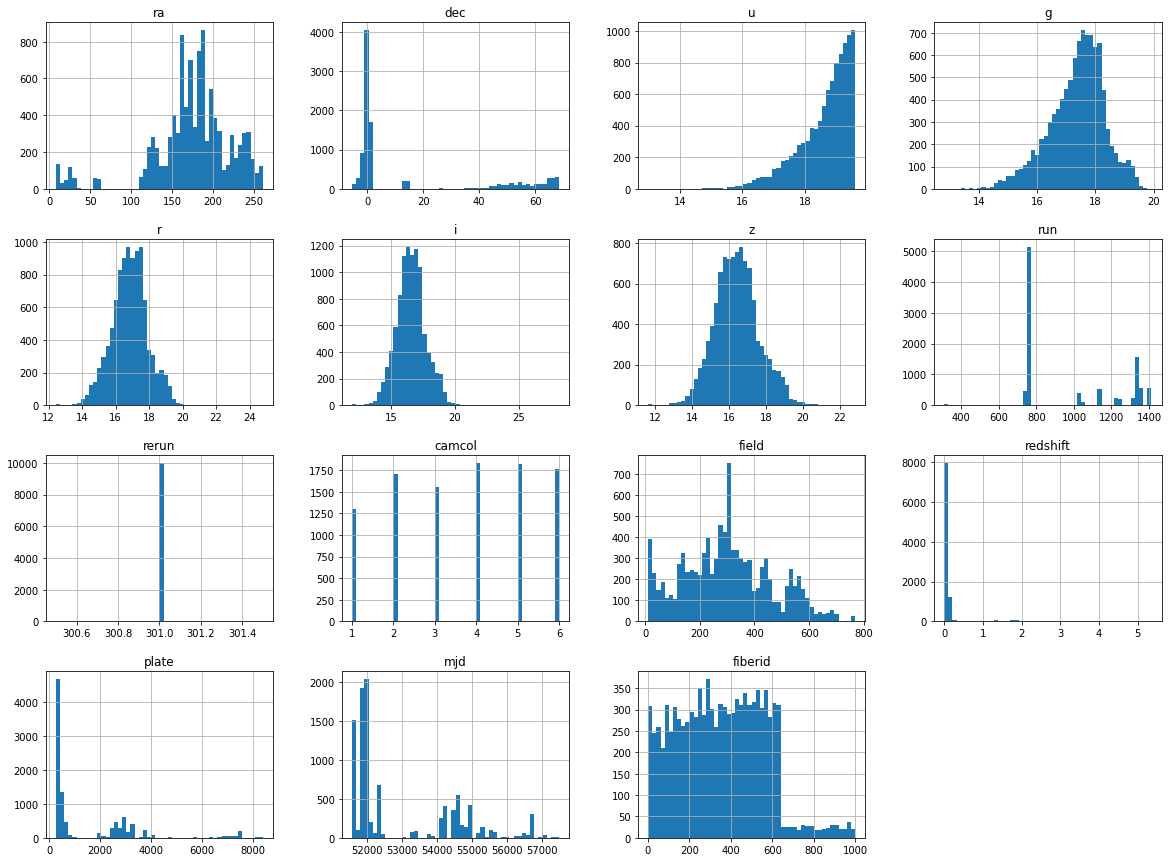

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

After dropping unuseful data from the dataset we look at the histogram of the dataset to see if there is values that are not useful.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])
data['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

Converts the class column and transforms 
galaxy as 0
star as 2
quasar as 1

Since the data need to be numeric for the model to use.

In [ ]:
newData = data.drop("class", axis = 1)

dataLabel = data['class']

drop the class column from the dataset to for model to train and keep the column as the results

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
values= scaler.fit_transform(newData)

values[0]

array([ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
       -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
       -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177])

Here we feature scale the data since the data had varying range of values we convert it into small ranges to accurately train the model

In [ ]:
from sklearn.model_selection import train_test_split

values_train, values_test, dataLabel_train, dataLabel_test = train_test_split(values, dataLabel, test_size=0.2, random_state=42)


Here we split the test and training dataset for model to use

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(values_train,dataLabel_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Here we make our model and train it using decision tree classifier

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file="/content/sample_data/decisionTreeModel.dot",
                feature_names=newData.columns )

We export the our model's graphical representation of decision tree to dot file to convert it into png 

In [ ]:
prediction = model.predict(values_test)

keys = dataLabel_test.keys()
i=0
correct=0
wrong=0
for x in keys:

  if(prediction[i]== dataLabel_test[x]):
    correct+=1
  else:
      wrong+=1
  i+=1

print("Correct prediction:\t" , correct , "\nWrong Prediction:\t" , wrong)

Correct prediction:	 1970 
Wrong Prediction:	 30


Here we can see that the decision tree classifier model works pretty well as it 

can predict the values accurately. Out of 2000 values tested using this model the model predicted 1970 correctly. The model predicted with 98.6% accuracy.